## Deep Learning Model

In [3]:
# LOADING THE PEQUIERD LIBRARIES

import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from  sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import Model

In [4]:
# LOADING THE TRAIN DATASET
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs1/actual/train_processed.csv",index_col = ["train_id"])
df

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,name_processed,brand_name_processed,category_name_preprocessed,Tier_1,Tier_2,Tier_3,processed_item_description
train_id,,,,,,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,mlb cincinnati reds shirt size xl,mlb,men/top/tshirts,men,top,tshirts,description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,razer blackwidow chroma keyboard,razer,electronic/computer tablet/component parts,electronic,computer tablet,component parts,keyboard great condition works like came box p...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,avaviv blouse,target,women/top blouse/blouse,women,top blouse,blouse,adorable top hint lace key hole back pale pink...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,leather horse statues,missing,home/home dcor/home dcor accents,home,home dcor,home dcor accents,new tags leather horses retail stand foot high...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,24k gold plated rose,missing,women/jewelry/necklaces,women,jewelry,necklaces,complete certificate authenticity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",3.044522,free people inspired dress,free people,women/dresse/midcalf,women,dresse,midcalf,lace says size small fits medium perfectly nev...
1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,2.708050,little mermaid handmade dress,disney,kid/girl 2t5t/dresses,kid,girl 2t5t,dresses,little mermaid handmade dress never worn size 2t
1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",2.564949,21 day fix containers eating plan,missing,sport outdoor/exercise/fitnes accessories,sport outdoor,exercise,fitnes accessories,used twice still great shape


In [5]:
# LOADING THE TEST DATASET
df_test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs1/actual/test_processed.csv",index_col = ["test_id"])
df_test

,name,item_condition_id,category_name,brand_name,shipping,item_description,name_processed,brand_name_processed,category_name_preprocessed,Tier_1,Tier_2,Tier_3,processed_item_description
test_id,,,,,,,,,,,,,
0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,breast cancer fight like girl ring,ring,women/jewelry/rings,women,jewelry,rings,size 7
1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",25 pcs new 75x12 kraft bubble mailers,missing,other/office supplie/shipping supplies,other,office supplie,shipping supplies,25 pcs new 75x12 kraft bubble mailers lined bu...
2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,coach bag,coach,vintage collectible/bag and purse/handbag,vintage collectible,bag and purse,handbag,brand new coach bag bought coach outlet
3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,floral kimono,missing,women/sweater/cardigan,women,sweater,cardigan,floral kimono never worn lightweight perfect h...
4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,life death,missing,other/book/religion spirituality,other,book,religion spirituality,rediscovering life loss loved one tony cooke p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460720,DARK SAMPLE BYE FOUNDATION MOISTURIZER,1,Beauty/Fragrance/Women,NaN,1,It cosmetics Bye Bye Foundation Full Coverage ...,dark sample bye foundation moisturizer,missing,beauty/fragrance/women,beauty,fragrance,women,cosmetics bye bye foundation full coverage moi...
3460721,bundle for @brandystash,2,Women/Pants/Other,NaN,1,♡2 pairs of omighty trackiez. one m and one s....,bundle brandystash,missing,women/pant/other,women,pant,other,2 pairs omighty trackiez one one prettiest pinks
3460722,Toddler High-top Converse,3,Kids/Girls 0-24 Mos/Shoes,Nike,0,Size 5 (toddler). Pink high top converse shoes...,toddler hightop converse,nike,kid/girl 024 mo/shoes,kid,girl 024 mo,shoes,size 5 toddler pink high top converse shoes st...


## train_test_split

In [6]:
'''SPLITTING THE DATASET'''

df_train,df_val = train_test_split(df,test_size=0.1,random_state = 3) 

In [7]:
print("Train Shape = ",df_train.shape)
print("Validation Shape = ",df_val.shape)

Train Shape =  (1334281, 15)
Validation Shape =  (148254, 15)


### Values of Y 

In [8]:
y_train = df_train.log_price
y_val = df_val.log_price

## 1. item_condition_id 

In [9]:
'''KEEPING THE ITEM CONDITON IS SAME '''

train_item_cond = df_train.item_condition_id
val_item_cond = df_val.item_condition_id
test_item_cond = df_test.item_condition_id

## 2. shipping

In [10]:
'''KEPPING THE SHIPPING SAME'''
train_shipping = df_train.shipping
val_shipping = df_val.shipping
test_shipping = df_test.shipping

### FUNCTION FOR TOKENIZING AND PADDING FEATURE

In [11]:
'''THIS FUNCTION TOKENIZES AND PADS THE FEATURE'''

def text_vectorizer(feature):
    # TOKENIZER
    tk = Tokenizer()
    # FIT ON TRAIN 
    tk.fit_on_texts(df_train[feature].apply(str))
    # TOKENIZES THE TRAIN DATASET
    tk_train = tk.texts_to_sequences(df_train[feature].apply(str))
    # TOKENIZES THE VALIDATION DATASET
    tk_val = tk.texts_to_sequences(df_val[feature].apply(str))
    
    # COMPUTES THE MAX LENGTH
    max_length = df_train[feature].apply(lambda x :len(str(x).split())).max()
    
    # COMPUTE THE VOCAB SIZE
    vocab_size = len(tk.word_index) + 1
    
    # PADDING THE TRAIN SEQUENCES
    train_pad= pad_sequences(tk_train,padding="post",maxlen = max_length)
    # PADDING THE VALIDATION SEQUENCES
    val_pad = pad_sequences(tk_val,padding = "post", maxlen = max_length)
    
    # RETURN THE TOKENIZER, MAX LENGTH , PADDED TRAIN SEQUENCES , PADDED VALIDATION SEQUENCES 
    return tk , max_length,vocab_size, train_pad , val_pad 

## 3.  brand_name

In [12]:
'''TOKENIZING BRAND NAME AND PADDING '''

tk_brand_name,max_length_brand_name,vocab_size_brand_name,train_brand_name_pad , val_brand_name_pad = text_vectorizer("brand_name_processed")

In [13]:
print("Trian Shape = ",train_brand_name_pad.shape)
print("Validation Shape = ",val_brand_name_pad.shape )

Trian Shape =  (1334281, 8)
Validation Shape =  (148254, 8)


In [14]:
print("Max Length = ", max_length_brand_name)
print("Vocal Size= ",vocab_size_brand_name)

Max Length =  8
Vocal Size=  5037


In [15]:
'''TOKENIZING BRAND NAME FOR TEST DATA'''

test_brand_name_pad = pad_sequences(tk_brand_name.texts_to_sequences(df_test.brand_name_processed),maxlen=max_length_brand_name,padding="post")
test_brand_name_pad.shape

(3460725, 8)

## 4. Tier_1

In [16]:
'''TOKENIZING TIER 1 AND PADDING '''

tk_tier1 , max_length_tier1 ,vocab_size_tier1,train_tier1_pad , val_tier1_pad = text_vectorizer("Tier_1")

In [17]:
print("Trian Shape = ",train_tier1_pad.shape)

print("Validation Shape =",val_tier1_pad.shape)

Trian Shape =  (1334281, 2)
Validation Shape = (148254, 2)


In [18]:
print("Max Length = ", max_length_tier1)
print("Vocal Size= ",vocab_size_tier1)

Max Length =  2
Vocal Size=  14


In [19]:
'''TOKEIZING AND PADDING TIER1 FOR TEST DATASET'''

test_tier1_pad = pad_sequences(tk_tier1.texts_to_sequences(df_test.Tier_1),maxlen=max_length_tier1,padding="post")
test_tier1_pad.shape

(3460725, 2)

## 5. Tier_2

In [20]:
'''TOKEIZING AND PADDING TIER2 FOR TRAIN AND VALIDATION DATASET'''

tk_tier2 , max_length_tier2 ,vocab_size_tier2,train_tier2_pad , val_tier2_pad = text_vectorizer("Tier_2")

In [21]:
print("Trian Shape = =",train_tier2_pad.shape)

print("Validation Shape = ",val_tier2_pad.shape)

Trian Shape = = (1334281, 4)
Validation Shape =  (148254, 4)


In [22]:
print("Max Length = ", max_length_tier2)
print("Vocal Size= ",vocab_size_tier2)

Max Length =  4
Vocal Size=  138


In [23]:
'''TOKEIZING AND PADDING TIER2 FOR TEST DATASET'''

test_tier2_pad = pad_sequences(tk_tier2.texts_to_sequences(df_test.Tier_2),maxlen=max_length_tier2,padding="post")
test_tier2_pad.shape

(3460725, 4)

## 6. Tier_3

In [24]:
'''TOKEIZING AND PADDING TIER3 FOR TRAIN AND VALIDATION DATASET'''

tk_tier3 , max_length_tier3 ,vocab_size_tier3,train_tier3_pad , val_tier3_pad = text_vectorizer("Tier_3")

In [25]:
print("Trian Shape = ",train_tier3_pad.shape)

print("Validation Shape = ",val_tier3_pad.shape)

Trian Shape =  (1334281, 6)
Validation Shape =  (148254, 6)


In [26]:
print("Max Length = ", max_length_tier3)
print("Vocal Size= ",vocab_size_tier3)

Max Length =  6
Vocal Size=  966


In [27]:
'''TOKEIZING AND PADDING TIER3 FOR TEST DATASET'''

test_tier3_pad = pad_sequences(tk_tier3.texts_to_sequences(df_test.Tier_3),maxlen=max_length_tier3,padding="post")
test_tier3_pad.shape

(3460725, 6)

##  7.  name_processed

In [28]:
'''TOKEIZING AND PADDING NAME PROCESSED FOR TRAIN AND VALIDATION DATASET'''

tk_name_processed , max_length_name_processed ,vocab_size_name_processed , train_name_processed_pad , val_name_processed_pad = text_vectorizer("name_processed")

In [29]:
print("Trian Shape = ",train_name_processed_pad.shape)

print("Validation Shape = ",val_name_processed_pad.shape)

Trian Shape =  (1334281, 13)
Validation Shape =  (148254, 13)


In [30]:
print("Max Length = ", max_length_name_processed)
print("Vocal Size= ",vocab_size_name_processed)

Max Length =  13
Vocal Size=  129083


In [31]:
'''TOKEIZING AND PADDING NAME PROCESSED FOR TEST DATASET'''

test_name_processed_pad = pad_sequences(tk_name_processed.texts_to_sequences(df_test.name_processed),maxlen=max_length_name_processed,padding="post")
test_name_processed_pad.shape

(3460725, 13)

## 8. item_ description

In [32]:
'''TOKEIZING AND PADDING ITEM DESCRIPTION FOR TRAIN AND VALIDATION DATASET'''

tk_desc , max_len_desc ,vocab_size_desc,train_desc_pad , val_desc_pad = text_vectorizer("processed_item_description")

In [33]:
print("Trian Shape = ",train_desc_pad.shape)

print("Validation Shape = ",val_desc_pad.shape)

Trian Shape =  (1334281, 193)
Validation Shape =  (148254, 193)


In [34]:
print("Max Length = ", max_len_desc)
print("Vocal Size= ",vocab_size_desc)

Max Length =  193
Vocal Size=  264441


In [35]:
'''TOKEIZING AND PADDING ITEM DESCRIPTION FOR TEST DATASET'''

test_item_desc_pad = pad_sequences(tk_desc.texts_to_sequences(df_test.processed_item_description),maxlen=max_len_desc,padding="post")
test_item_desc_pad.shape

(3460725, 193)

### Values for Target

In [36]:
'''STORING THE LOG PRICES AS TARGET VALUES'''

y_train = df_train.log_price
y_val = df_val.log_price

In [38]:
'''STORING THE FEATURES IN LIST FORM'''

# TRAIN FEATURES
x_train = [train_item_cond,train_shipping,train_brand_name_pad,train_tier1_pad,train_tier2_pad,train_tier3_pad,train_name_processed_pad,train_desc_pad]
# VALIDATION FEATURES
x_val= [val_item_cond,val_shipping,val_brand_name_pad,val_tier1_pad,val_tier2_pad,val_tier3_pad,val_name_processed_pad,val_desc_pad]
# TEST VALIDATION
x_test= [test_item_cond,test_shipping,test_brand_name_pad,test_tier1_pad,test_tier2_pad,test_tier3_pad,test_name_processed_pad,test_item_desc_pad]

## Architecture

In [39]:
tf.keras.backend.clear_session()

# ITEM CONDITION ID
inp1 = layers.Input(shape=(1)) # INPUT 1 
emb1  = layers.Embedding(6,10,input_length=1)(inp1) # EMBEDDING 1
flat1 = layers.Flatten()(emb1) # FLATTEN


# SHIPPING 
inp2 = layers.Input(shape=(1)) # INPUT 2 
d2 = layers.Dense(10,activation="relu")(inp2) # DENSE LAYER 2


# BRAND NAME
inp3 = layers.Input(shape= (8)) # INPUT 3
emb3 = layers.Embedding(vocab_size_brand_name ,16 ,input_length= 8 )(inp3) # EMBEDDING 3
flat3 = layers.Flatten()(emb3) # FLATTEN

# Tier_1
inp4 = layers.Input(shape = (2)) # INPUT 4
emb4 = layers.Embedding(vocab_size_tier1, 16 , input_length=2 )(inp4) # EMBEDDING 4
flat4 = layers.Flatten()(emb4) # FLATTEN 

# Tier_2
inp5= layers.Input(shape = (4)) # INPUT 5
emb5 = layers.Embedding(vocab_size_tier2 , 16 ,input_length= 4 )(inp5) # EMBEDDING 5
flat5 = layers.Flatten()(emb5) # FLATTEN

# Tier_3
inp6= layers.Input(shape = (6)) # INPUT 6 
emb6 = layers.Embedding(vocab_size_tier3, 16 ,input_length= 6 )(inp6) # EMBEDDING 6
flat6 = layers.Flatten()(emb6) # FLATTEN

# NAME PROCESSED
inp7= layers.Input(shape = (13)) # INPUT 7
emb7 = layers.Embedding(vocab_size_name_processed,20 ,input_length= 13 )(inp7) # EMBEDDING 7
gru7 = layers.GRU(64,return_sequences=True)(emb7) # GRU
flat7 = layers.Flatten()(lstm7) # FLATTEN

# ITEM DESCRIPTION
inp8= layers.Input(shape = (193)) # INPUT 8 
emb8 = layers.Embedding(vocab_size_desc , 40 , input_length= 193 )(inp8) # EMBEDDING 8
lstm8 = layers.GRU(64,return_sequences=True)(emb8) # GRU
flat8 = layers.Flatten()(lstm8) # FLATTEN

# COCATINATE
concat = layers.Concatenate()([flat1,d2,flat3,flat4,flat5,flat6,flat7,flat8])

# DENSE LAYERS
dense1 = layers.Dense(512,activation="relu")(concat)
# DROPOUT LAYER
drop2 = layers.Dropout(0.2)(dense1)
# DENSE LAYER
dense2 = layers.Dense(256,activation="relu")(drop2)
# DROPOUT LAYER
drop2 = layers.Dropout(0.3)(dense2)
# DENSE LAYER
dense3 = layers.Dense(128,activation="relu")(drop2)
# DROPOUT LAYER
drop2 = layers.Dropout(0.4)(dense3)
# BATCHNORM LAYER
bn2  = layers.BatchNormalization()(drop2)
# DENSE LAYER
dense4 = layers.Dense(1,activation="linear")(bn2)
# MODEL
model =  Model(inputs= [inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8],outputs=dense4)

# SCHEDULE
def shedule(epoch,lr):
    if epoch<=2:
        return lr
    else:
        return lr*0.1
# CALLBACKS
lr = tf.keras.callbacks.LearningRateScheduler(shedule,verbose=1)
save = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/cs1/deep_learning_model/save1/best.h5",monitor="val_root_mean_squared_error",mode="min",save_best_only=True, save_weights_only=True,verbose=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_root_mean_squared_error",min_delta= 0.01, patience=2,mode="min" )

# COMPILING MODEL
model.compile(optimizer="adam",loss="mse",metrics=  tf.keras.metrics.RootMeanSquaredError())

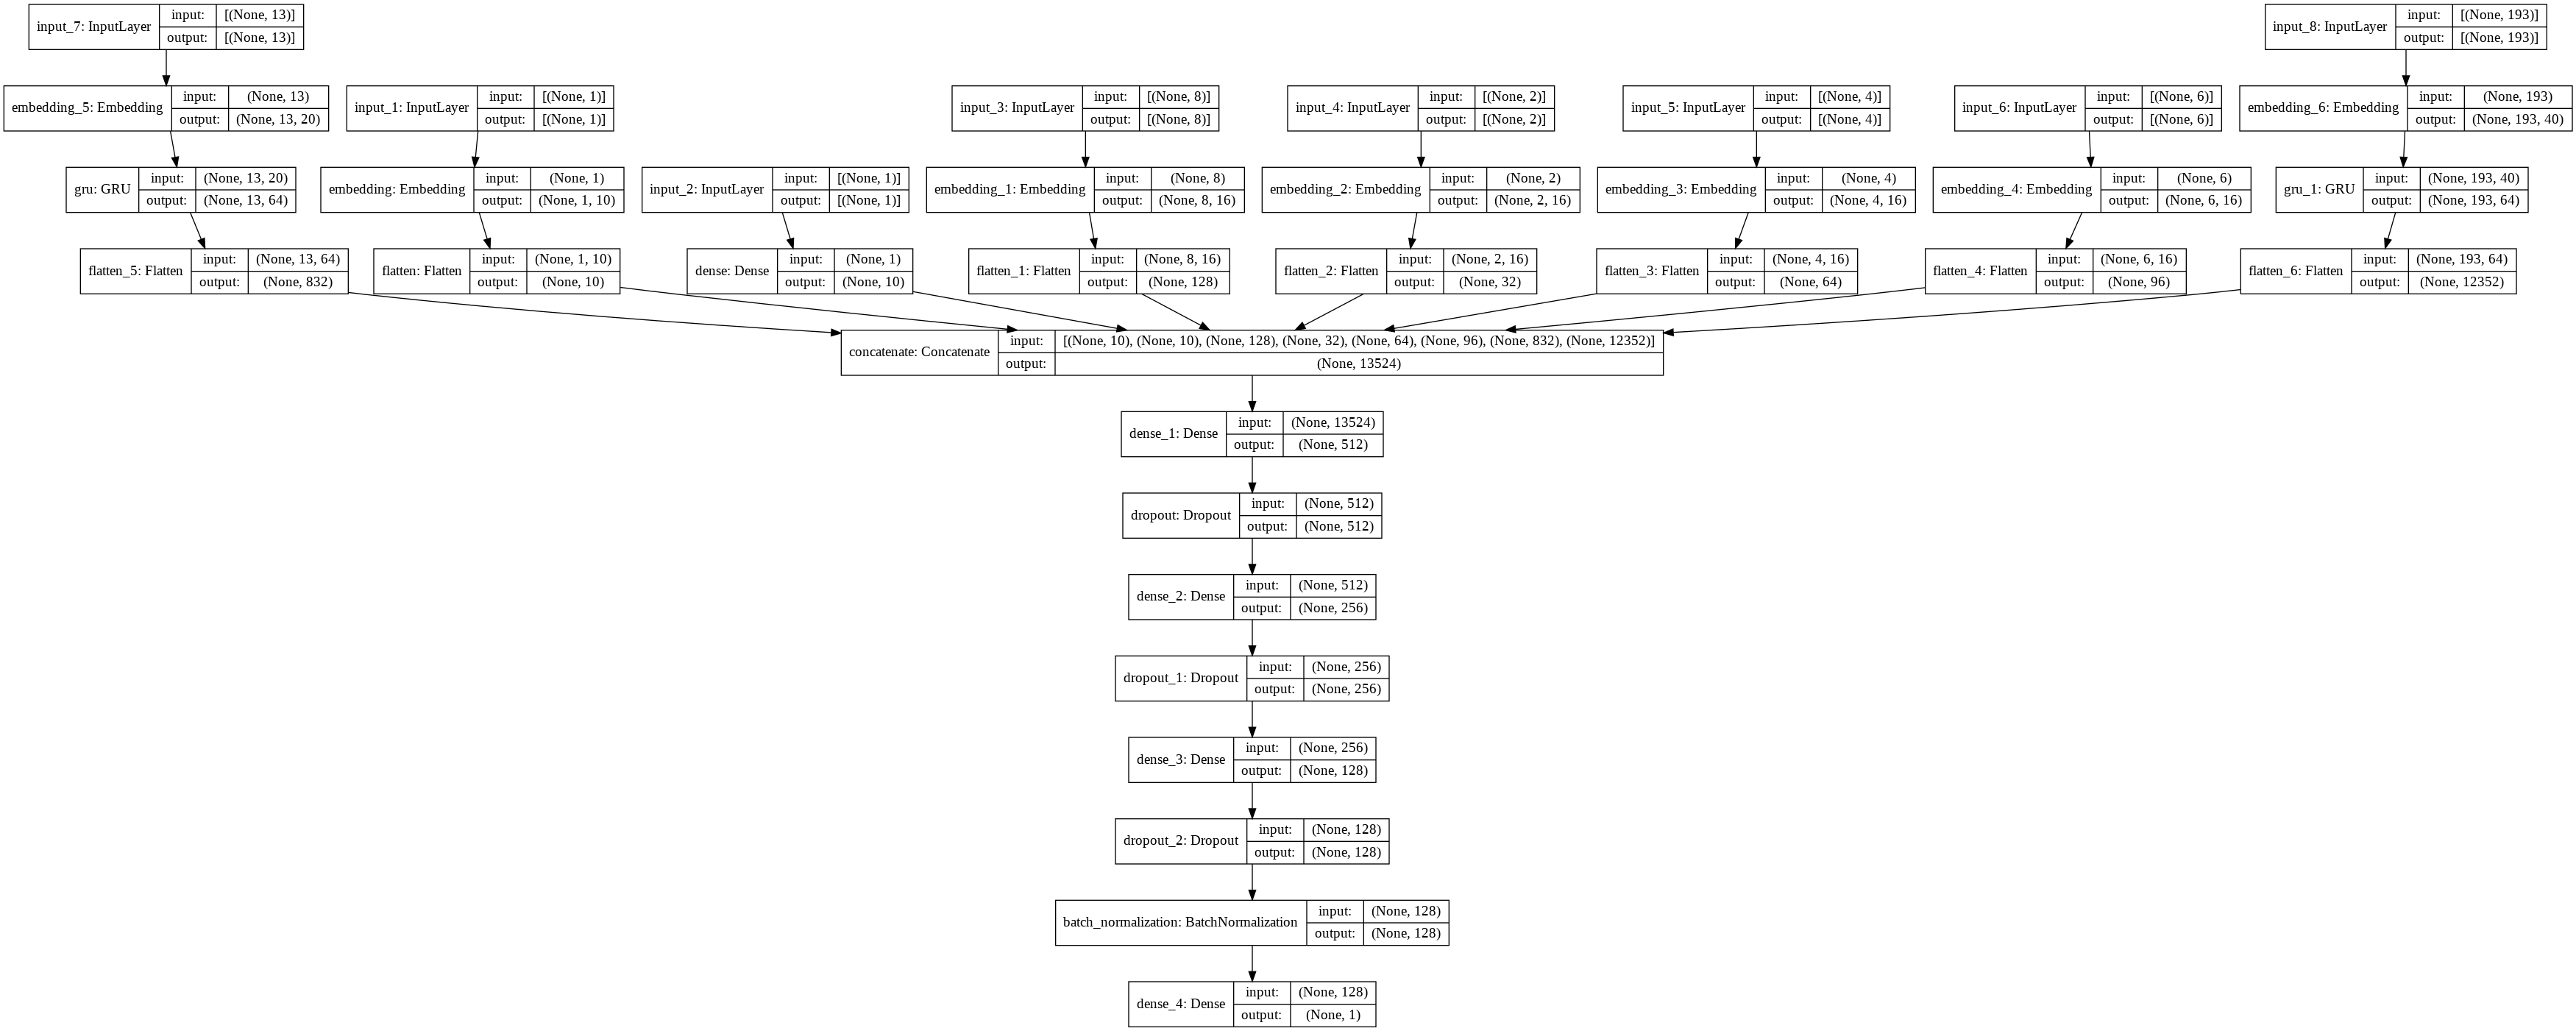

In [69]:
# PLOTTING THE MODEL ARCHITECTURE
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# FITTING THE MODEL

model.fit(x=x_train,y=y_train,validation_data=(x_val,y_val) ,epochs=10,batch_size = 100,callbacks=[save,lr,earlystop])

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
13343/13343 [==============================] - 2183s 163ms/step - loss: 0.3006 - root_mean_squared_error: 0.5483 - val_loss: 0.2056 - val_root_mean_squared_error: 0.4534

Epoch 00001: val_root_mean_squared_error improved from inf to 0.45339, saving model to /content/drive/MyDrive/Colab Notebooks/cs1/deep_learning_model/save1/best.h5
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
13343/13343 [==============================] - 2140s 160ms/step - loss: 0.2111 - root_mean_squared_error: 0.4595 - val_loss: 0.1899 - val_root_mean_squared_error: 0.4357

Epoch 00002: val_root_mean_squared_error improved from 0.45339 to 0.43572, saving model to /content/drive/MyDrive/Colab Notebooks/cs1/deep_learning_model/save1/best.h5
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
13343/13343 [=========================

In [60]:
# LOADING THE MODEL
model.load_weights("/content/drive/MyDrive/Colab Notebooks/cs1/deep_learning_model/save1/best.h5")

In [62]:
# EVALUATING THE MODEL
model.evaluate(x_val,y_val,batch_size=1000)

149/149 [==============================] - 3s 21ms/step - loss: 0.1863 - root_mean_squared_error: 0.4316


[0.18630225956439972, 0.43162745237350464]

In [63]:
# CONVERING THE LOG PRICE TO ACTUAL PRICE

def log_to_actual(log):
    return np.exp(log)-1

In [66]:
#PREDICTING THE RESULTS FOR TEST DATASET
x_test_pred = model.predict(x_test,batch_size=100,verbose=1)

34608/34608 [==============================] - 260s 8ms/step


In [67]:
# CONVERTIN THE LOG PRICE TO ACTUL PRICE

test_predict_lstm = pd.DataFrame(log_to_actual(x_test_pred),columns=["price"])
test_predict_lstm.index = df_test.index
test_predict_lstm

,price
test_id,
0,5.550148
1,15.609177
2,59.941963
3,13.342530
4,10.122484
...,...
3460720,7.771764
3460721,55.717674
3460722,16.296186


In [68]:
# STORING THE PREDICTED PRICES 

test_predict_lstm.to_csv("/content/drive/MyDrive/Colab Notebooks/cs1/deep_learning_model/test_predict_lstm.csv")

## Kaggle Score

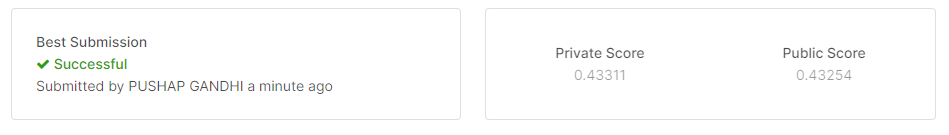

In [1]:
from IPython.display import Image
Image("screenshot/lstm.png") 

## Model Comparison

In [4]:
'''COMPARISON OF ALL MODELS'''

res = pd.DataFrame()
res["Model"] = ["Benchmark","Lasso","Ridge","Decision Tree","Random Forest","Light GBM","linear Regression","Ridge","Deep Learning"]
res["Feature Type"] = ["-","Label Endoing+Word2Vec","Label Endoing+Word2Vec","Label Endoing+Word2Vec","Label Endoing+Word2Vec","Label Endoing+Word2Vec","One hot endoding + Tfidf", "One hot endoding + Tfidf","Embedding"]
res["Best Param"] = ["-",1e-5,10,10,500,1200,"-",10,"-"]
res["Train Error"] = [0.7267,0.6043,0.6043,0.6273,"-",0.4784,0.4241,4414,0.4000]
res["Validation Error"] = [0.7255,0.6037,0.6037,0.6353,"-",0.5008,0.4620,0.4581,0.4316]
res["Test Error"] = [0.72753,0.60518,0.60518,0.6370,"-",0.50050,0.46210,0.45831,0.43311]
res

,Model,Feature Type,Best Param,Train Error,Validation Error,Test Error
0,Benchmark,-,-,0.7267,0.7255,0.72753
1,Lasso,Label Endoing+Word2Vec,1e-05,0.6043,0.6037,0.60518
2,Ridge,Label Endoing+Word2Vec,10,0.6043,0.6037,0.60518
3,Decision Tree,Label Endoing+Word2Vec,10,0.6273,0.6353,0.637
4,Random Forest,Label Endoing+Word2Vec,500,-,-,-
5,Light GBM,Label Endoing+Word2Vec,1200,0.4784,0.5008,0.5005
6,linear Regression,One hot endoding + Tfidf,-,0.4241,0.462,0.4621
7,Ridge,One hot endoding + Tfidf,10,4414,0.4581,0.45831
8,Deep Learning,Embedding,-,0.4,0.4316,0.43311


## Observation:
* The best model is Deep Learning model.
* Machine Learning models give decent values of performance mertic, but a simple RNN based model peroforms better.